## Association Rule Mining

### Import Libraries

In [ ]:
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

####  Generate Synthetic Transactional Data

In [49]:
# Generate more distinctive synthetic data
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 
         'cheese', 'yogurt', 'apple', 'banana', 'coffee',
         'tea', 'sugar', 'flour', 'butter', 'jam',
         'cereal', 'juice', 'soda', 'chips', 'cookies']

# Create transactions with clearer patterns
transactions = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread', 'butter'],
    ['beer', 'chips', 'nuts'],
    ['diapers', 'baby_wipes', 'milk'],
    ['coffee', 'sugar', 'cookies'],
    ['bread', 'jam', 'butter'],
    ['beer', 'nuts', 'chips'],
    ['milk', 'cereal', 'banana'],
    ['eggs', 'bread', 'cheese'],
    ['tea', 'sugar', 'lemon'],
    ['milk', 'bread', 'eggs', 'butter'],
    ['beer', 'chips', 'peanuts'],
    ['diapers', 'baby_wipes', 'baby_oil'],
    ['coffee', 'milk', 'sugar'],
    ['bread', 'jam', 'peanut_butter'],
    ['beer', 'pretzels', 'chips'],
    ['milk', 'cookies', 'banana'],
    ['eggs', 'cheese', 'ham'],
    ['tea', 'honey', 'lemon'],
    ['milk', 'bread', 'cereal']
] * 3  

# Display first 5 transactions
print("Sample transactions:")
for i in range(5):
    print(f"Transaction {i+1}: {transactions[i]}")

Sample transactions:
Transaction 1: ['milk', 'bread', 'eggs']
Transaction 2: ['milk', 'bread', 'butter']
Transaction 3: ['beer', 'chips', 'nuts']
Transaction 4: ['diapers', 'baby_wipes', 'milk']
Transaction 5: ['coffee', 'sugar', 'cookies']


#### One-Hot Encode the Transaction Data

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets with min_support=0.2
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

#### Apply Apriori Algorithm

In [ ]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

### Rule Analysis

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_sorted = rules.sort_values(by='lift', ascending=False).head(5)
print(rules_sorted )

  antecedents consequents  antecedent support  consequent support  support  \
0     (chips)      (beer)                0.20                0.20      0.2   
1      (beer)     (chips)                0.20                0.20      0.2   
2     (bread)      (milk)                0.35                0.40      0.2   
3      (milk)     (bread)                0.40                0.35      0.2   

   confidence      lift  representativity  leverage  conviction  \
0    1.000000  5.000000               1.0      0.16         inf   
1    1.000000  5.000000               1.0      0.16         inf   
2    0.571429  1.428571               1.0      0.06         1.4   
3    0.500000  1.428571               1.0      0.06         1.3   

   zhangs_metric   jaccard  certainty  kulczynski  
0       1.000000  1.000000   1.000000    1.000000  
1       1.000000  1.000000   1.000000    1.000000  
2       0.461538  0.363636   0.285714    0.535714  
3       0.500000  0.363636   0.230769    0.535714  


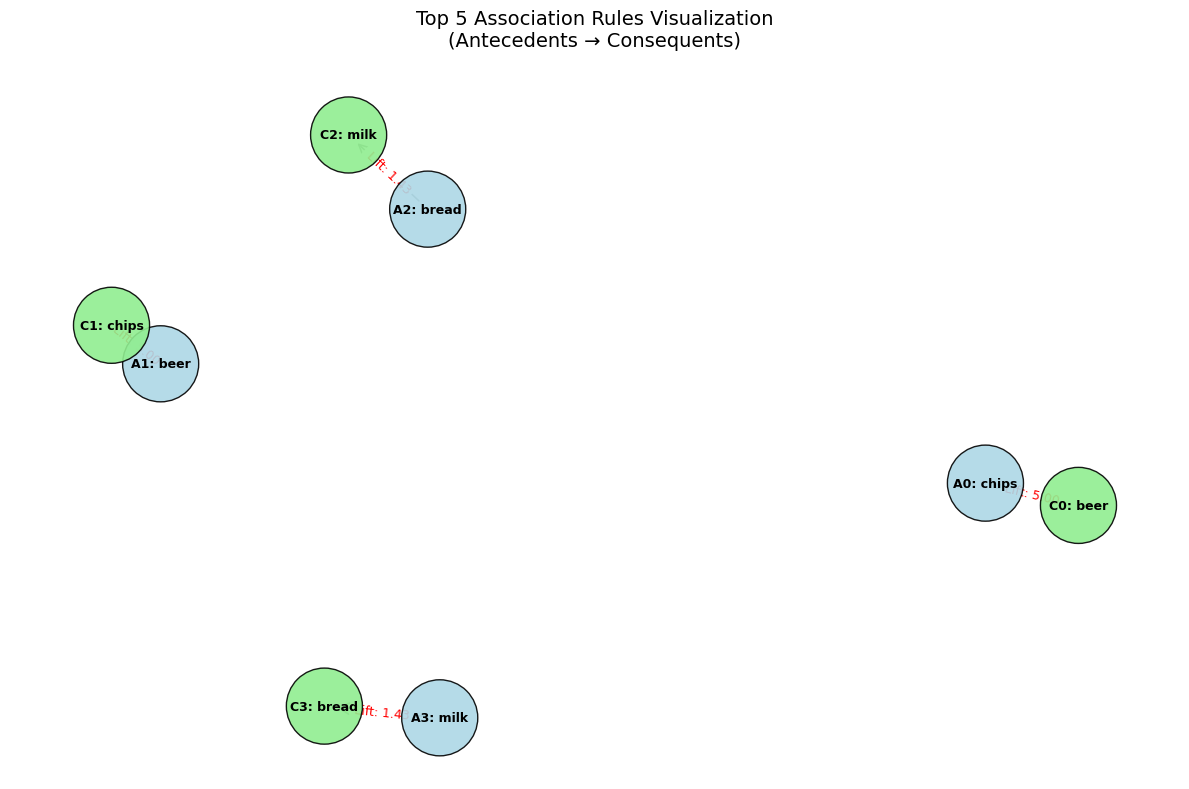

In [56]:
# Create graph with unique identifiers for each node
G = nx.DiGraph()

for i, row in enumerate(rules_sorted.iterrows()):
    antecedents = ', '.join(list(row[1]['antecedents']))
    consequents = ', '.join(list(row[1]['consequents']))
    # Add unique identifiers to distinguish same itemsets in different rules
    G.add_edge(f"A{i}: {antecedents}", f"C{i}: {consequents}", 
               weight=row[1]['lift'], label=f"Lift: {row[1]['lift']:.2f}")

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Increased k for more spacing

# Draw nodes with different colors for antecedents vs consequents
node_colors = []
for node in G.nodes():
    if node.startswith('A'):
        node_colors.append('lightblue')  # Antecedents
    else:
        node_colors.append('lightgreen')  # Consequents

nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, 
                       edgecolors='black', alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Draw edges
edge_weights = [d['weight']*0.8 for (_, _, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', 
                       arrowsize=20, arrowstyle='->')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                            font_color='red', font_size=9)

plt.title('Top 5 Association Rules Visualization\n(Antecedents → Consequents)', 
          fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()